# 1) Libraries

In [3]:
import pandas as pd
# import geopandas as gpd
# import folium
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from pathlib import Path
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# 2) Datasets 

# 3) Preprocessing

## i) Flight Dataframe

In [4]:
flight_data = Path(r'C:\Users\miows\Downloads\final_flight_data.csv')
#flight_df = pd.read_csv("~/Desktop/flight_data.csv")
#flight_data = Path(r'C:\Users\Xulei Guo\Desktop\flight_data.csv')

# Loading flight dataset into dataframe
flight_df = pd.read_csv(flight_data)

# Renaming date column 
flight_df.rename(columns = {'FL_DATE':'Date'}, inplace = True)

# Changing format of date column to yyyy-mm-dd
flight_df['Date']= pd.to_datetime(flight_df['Date']).dt.strftime('%Y-%m-%d')

flight_df.head()

,Unnamed: 0,MONTH,DAY_OF_WEEK,Date,OP_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ELAPSED_TIME,DISTANCE,V14
0,1,11,4,2019-11-28,WN,STL,MO,LGA,NY,1310,0.0,0.0,140.0,888,NaN
1,2,11,4,2019-11-28,WN,STL,MO,LGA,NY,825,-4.0,0.0,140.0,888,NaN
2,3,11,4,2019-11-28,WN,TPA,FL,ALB,NY,1155,-8.0,0.0,165.0,1130,NaN
3,4,11,4,2019-11-28,WN,TPA,FL,BUF,NY,900,42.0,1.0,155.0,1053,NaN
4,5,11,4,2019-11-28,WN,TPA,FL,ISP,NY,605,-3.0,0.0,150.0,1034,NaN


In [5]:
# Convert departure time to 4-digit format
flight_df['CRS_DEP_TIME']= flight_df['CRS_DEP_TIME'].astype(str).str.zfill(4)

# Extract hour
flight_df['CRS_DEP_TIME'] = flight_df['CRS_DEP_TIME'].str[0:2]
flight_df.head()

,Unnamed: 0,MONTH,DAY_OF_WEEK,Date,OP_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ELAPSED_TIME,DISTANCE,V14
0,1,11,4,2019-11-28,WN,STL,MO,LGA,NY,13,0.0,0.0,140.0,888,NaN
1,2,11,4,2019-11-28,WN,STL,MO,LGA,NY,08,-4.0,0.0,140.0,888,NaN
2,3,11,4,2019-11-28,WN,TPA,FL,ALB,NY,11,-8.0,0.0,165.0,1130,NaN
3,4,11,4,2019-11-28,WN,TPA,FL,BUF,NY,09,42.0,1.0,155.0,1053,NaN
4,5,11,4,2019-11-28,WN,TPA,FL,ISP,NY,06,-3.0,0.0,150.0,1034,NaN


In [6]:
# Drop useless columns
flight_df.drop('Unnamed: 0', axis = 1, inplace = True)
flight_df.drop('V14', axis = 1, inplace = True)

flight_df.head()

,MONTH,DAY_OF_WEEK,Date,OP_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,11,4,2019-11-28,WN,STL,MO,LGA,NY,13,0.0,0.0,140.0,888
1,11,4,2019-11-28,WN,STL,MO,LGA,NY,08,-4.0,0.0,140.0,888
2,11,4,2019-11-28,WN,TPA,FL,ALB,NY,11,-8.0,0.0,165.0,1130
3,11,4,2019-11-28,WN,TPA,FL,BUF,NY,09,42.0,1.0,155.0,1053
4,11,4,2019-11-28,WN,TPA,FL,ISP,NY,06,-3.0,0.0,150.0,1034


In [7]:
flight_df['ORIGIN_STATE_ABR'].value_counts(ascending = False)

NY    1276292
FL     237915
IL     107200
CA     102914
NC      82762
GA      82526
VA      72065
MA      69021
TX      64360
MI      52048
OH      32346
MD      29217
CO      23516
PA      21118
TN      20822
MN      20207
NV      19629
SC      17176
PR      16712
MO      16594
ME      12862
KY      12467
AZ      12421
WA      11872
NJ      10086
LA       9987
UT       8352
WI       8326
IN       8128
VT       7996
OR       4500
AL       2316
AR       2298
NE       1780
HI       1558
VI       1501
NM       1252
IA        913
NH        908
WY         74
MT         42
Name: ORIGIN_STATE_ABR, dtype: int64

## ii) US Holidays Dataframe

In [8]:
# Loading US holiday dataset into dataframe
usholidays_df = pd.read_csv("usholidays.csv")

In [9]:
usholidays_df.head()

,Unnamed: 0,Date,Holiday
0,0,2010-12-31,New Year's Day
1,1,2011-01-17,"Birthday of Martin Luther King, Jr."
2,2,2011-02-21,Washington's Birthday
3,3,2011-05-30,Memorial Day
4,4,2011-07-04,Independence Day


In [10]:
# Drop Unnamed: 0 column
usholidays_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
usholidays_df.head()

,Date,Holiday
0,2010-12-31,New Year's Day
1,2011-01-17,"Birthday of Martin Luther King, Jr."
2,2011-02-21,Washington's Birthday
3,2011-05-30,Memorial Day
4,2011-07-04,Independence Day


In [12]:
usholidays_df.shape

(485, 2)

In [13]:
type(usholidays_df['Date'][0])

str

In [14]:
usholidays_df[usholidays_df['Date'] == '2016-01-01']

,Date,Holiday
50,2016-01-01,New Year's Day


In [15]:
usholidays_df[usholidays_df['Date'] == '2019-12-25']

,Date,Holiday
89,2019-12-25,Christmas Day


In [16]:
usholidays_df = usholidays_df[50:90]

In [17]:
usholidays_df.shape

(40, 2)

In [18]:
# Reset index
usholidays_df = usholidays_df.reset_index(drop = True)

In [19]:
# Replace Holiday column with 1's
usholidays_df['Holiday'] = 1

In [20]:
usholidays_df

,Date,Holiday
0,2016-01-01,1
1,2016-01-18,1
2,2016-02-15,1
3,2016-05-30,1
4,2016-07-04,1
5,2016-09-05,1
6,2016-10-10,1
7,2016-11-11,1
8,2016-11-24,1
9,2016-12-26,1


## iii) Weather Dataframe

In [21]:
# Loading Weather dataset into dataframe
weather_df = pd.read_csv("weather.csv")

# Taking 3 columns of dataframe 
weather_df = pd.DataFrame(weather_df[["Name", "Date time", "Conditions"]])

In [22]:
# Changing the format of date to yyyy-mm-dd
weather_df['Date time'] = pd.to_datetime(weather_df['Date time']).dt.strftime('%Y-%m-%d')

# Renaming column 'Date time' to 'Date'
weather_df.rename(columns = {'Date time':'Date'}, inplace = True)

In [23]:
# Simplifying values in column 'Name'

weather_df['Name'].unique()
weather_df['Name'] = weather_df['Name'].replace(['Central Park, New York, NY, United States', 
                                            'JFK Expy, New York, NY 11430, United States'],['LGA', 'JFK'])

# Renaming 'Name' column to 'ORIGIN' so it matches the column of flight_df 
weather_df.rename(columns = {'Name':'ORIGIN'}, inplace = True)

In [24]:
weather_df.head()

,ORIGIN,Date,Conditions
0,LGA,2016-01-01,Partially cloudy
1,LGA,2016-01-02,Partially cloudy
2,LGA,2016-01-03,Clear
3,LGA,2016-01-04,Partially cloudy
4,LGA,2016-01-05,Clear


In [25]:
weather_df['Conditions'].unique()

array(['Partially cloudy', 'Clear', 'Overcast', 'Rain, Overcast',
       'Snow, Partially cloudy', 'Rain, Partially cloudy', 'Snow',
       'Snow, Overcast', 'Rain'], dtype=object)

In [26]:
weather_df['Conditions'].nunique()

9

In [27]:
flight_df.head()

,MONTH,DAY_OF_WEEK,Date,OP_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,11,4,2019-11-28,WN,STL,MO,LGA,NY,13,0.0,0.0,140.0,888
1,11,4,2019-11-28,WN,STL,MO,LGA,NY,08,-4.0,0.0,140.0,888
2,11,4,2019-11-28,WN,TPA,FL,ALB,NY,11,-8.0,0.0,165.0,1130
3,11,4,2019-11-28,WN,TPA,FL,BUF,NY,09,42.0,1.0,155.0,1053
4,11,4,2019-11-28,WN,TPA,FL,ISP,NY,06,-3.0,0.0,150.0,1034


In [28]:
# merge the three dataframe

# Merging flight and holiday dataframe
flight_n_holidays = pd.merge(flight_df, usholidays_df, left_on = ['Date'], right_on = ['Date'], how = 'left')

# Replace the 'NaN's in holiday column with 0
flight_n_holidays["Holiday"] = flight_n_holidays["Holiday"].fillna(0)

# Joining the above dataframe with weather dataframe
full_df = pd.merge(flight_n_holidays, weather_df, left_on = ['Date', 'ORIGIN'], right_on = ['Date', 'ORIGIN'], 
                   how = 'inner')

# Delete columns with delay reasons
full_df = full_df.drop(['ORIGIN_STATE_ABR'], axis = 1)
full_df.head()

,MONTH,DAY_OF_WEEK,Date,OP_CARRIER,ORIGIN,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ELAPSED_TIME,DISTANCE,Holiday,Conditions
0,11,5,2019-11-29,WN,LGA,ATL,GA,11,-1.0,0.0,170.0,762,0.0,Clear
1,11,5,2019-11-29,WN,LGA,ATL,GA,16,-2.0,0.0,165.0,762,0.0,Clear
2,11,5,2019-11-29,WN,LGA,ATL,GA,10,-6.0,0.0,170.0,762,0.0,Clear
3,11,5,2019-11-29,WN,LGA,ATL,GA,06,-2.0,0.0,160.0,762,0.0,Clear
4,11,5,2019-11-29,WN,LGA,ATL,GA,20,-4.0,0.0,165.0,762,0.0,Clear


In [29]:
# Preprocessing step

# Eliminating rows with missing values
print((full_df.shape[0] - full_df.dropna().shape[0])/full_df.shape[0] * 100)
full_df = full_df.dropna()
full_df.shape

2.635972565593718


(955810, 14)

In [30]:
full_df['DEP_DEL15'] = pd.to_numeric(full_df['DEP_DEL15'], downcast='integer')
full_df['Holiday'] = pd.to_numeric(full_df['Holiday'], downcast='integer')
full_df['CRS_ELAPSED_TIME'] = pd.to_numeric(full_df['CRS_ELAPSED_TIME'], downcast='integer')
full_df.head()

,MONTH,DAY_OF_WEEK,Date,OP_CARRIER,ORIGIN,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ELAPSED_TIME,DISTANCE,Holiday,Conditions
0,11,5,2019-11-29,WN,LGA,ATL,GA,11,-1.0,0,170,762,0,Clear
1,11,5,2019-11-29,WN,LGA,ATL,GA,16,-2.0,0,165,762,0,Clear
2,11,5,2019-11-29,WN,LGA,ATL,GA,10,-6.0,0,170,762,0,Clear
3,11,5,2019-11-29,WN,LGA,ATL,GA,06,-2.0,0,160,762,0,Clear
4,11,5,2019-11-29,WN,LGA,ATL,GA,20,-4.0,0,165,762,0,Clear


In [31]:
# Check the unique numbers of columns
print(full_df['MONTH'].nunique())
print(full_df['DAY_OF_WEEK'].nunique())
print(full_df['DEP_DEL15'].unique())

12
7
[0 1]


## Outliers detection for Scheduled Flight Duration ('CRS_ELAPSED_TIME')

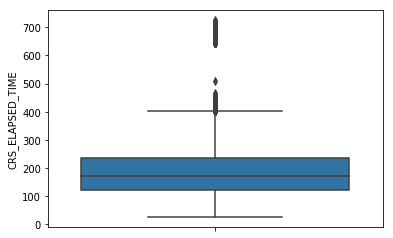

In [32]:
sns.boxplot(y = full_df['CRS_ELAPSED_TIME'])

In [33]:
full_df['CRS_ELAPSED_TIME'].describe()

count    955810.000000
mean        192.304145
std          96.838666
min          24.000000
25%         121.000000
50%         170.000000
75%         234.000000
max         727.000000
Name: CRS_ELAPSED_TIME, dtype: float64

In [34]:
# Outliers above upper bound
duration_stats= full_df['CRS_ELAPSED_TIME'].describe()
IQR= duration_stats[6]- duration_stats[4]
upper_bound= 3* IQR + duration_stats[6]
full_df[full_df['CRS_ELAPSED_TIME']> upper_bound].shape[0]

1555

In [35]:
# Outliers below lower bound
lower_bound= duration_stats[4] - 3* IQR
full_df[full_df['CRS_ELAPSED_TIME']< lower_bound].shape[0]

0

In [36]:
full_df= full_df[full_df['CRS_ELAPSED_TIME'] <= upper_bound]
full_df.head()

,MONTH,DAY_OF_WEEK,Date,OP_CARRIER,ORIGIN,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ELAPSED_TIME,DISTANCE,Holiday,Conditions
0,11,5,2019-11-29,WN,LGA,ATL,GA,11,-1.0,0,170,762,0,Clear
1,11,5,2019-11-29,WN,LGA,ATL,GA,16,-2.0,0,165,762,0,Clear
2,11,5,2019-11-29,WN,LGA,ATL,GA,10,-6.0,0,170,762,0,Clear
3,11,5,2019-11-29,WN,LGA,ATL,GA,06,-2.0,0,160,762,0,Clear
4,11,5,2019-11-29,WN,LGA,ATL,GA,20,-4.0,0,165,762,0,Clear


## Outliers for 'DISTANCE'

count    954255.000000
mean       1025.684277
std         719.473485
min          94.000000
25%         483.000000
50%         765.000000
75%        1389.000000
max        2586.000000
Name: DISTANCE, dtype: float64


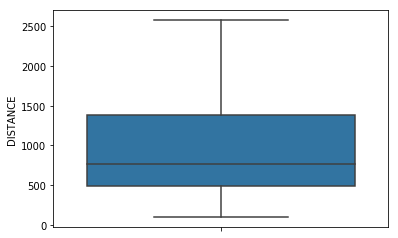

In [37]:
sns.boxplot(y = full_df['DISTANCE'])
print(full_df['DISTANCE'].describe())

In [38]:
# Outliers above upper bound
distance_stats= full_df['DISTANCE'].describe()
IQR= distance_stats[6]- distance_stats[4]
upper_bound= 3* IQR + distance_stats[6]
full_df[full_df['DISTANCE']> upper_bound].shape[0]

0

In [39]:
# Outliers below lower bound
lower_bound= distance_stats[4] - 3* IQR
full_df[full_df['DISTANCE'] < lower_bound].shape[0]

0

## Outliers for Departure Delay in Minutes ('DEP_DELAY')

In [40]:
delay_stats = full_df['DEP_DELAY'].describe()

In [41]:
# Outliers above upper bound
IQR= delay_stats[6]- delay_stats[4]
upper_bound= 3* IQR + delay_stats[6]
full_df[full_df['DEP_DELAY']> upper_bound].shape[0]

88603

In [42]:
# Outliers below lower bound
lower_bound= delay_stats[4] - 3* IQR
full_df[full_df['DEP_DELAY'] < lower_bound].shape[0]

2

In [43]:
88605/len(full_df) *100

9.285253941556503

In [44]:
full_df.shape

(954255, 14)

# 4) Analysis

## i) Descriptive Analysis

### a) DEPARTURE DELAY (MINUTES)

In [45]:
full_df['DEP_DELAY'].describe()

count    954255.000000
mean         13.486476
std          51.873630
min         -84.000000
25%          -6.000000
50%          -2.000000
75%           9.000000
max        1669.000000
Name: DEP_DELAY, dtype: float64

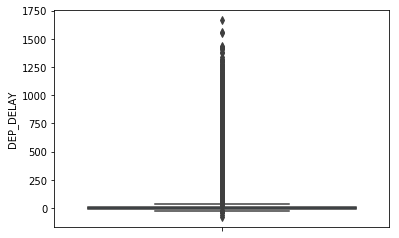

In [46]:
sns.boxplot(y = full_df['DEP_DELAY'])

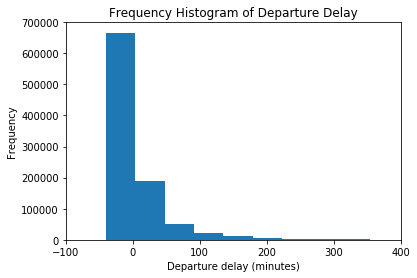

In [47]:
plt.hist(full_df['DEP_DELAY'], bins = 40)
plt.gca().set(title='Frequency Histogram of Departure Delay', xlabel='Departure delay (minutes)', ylabel='Frequency')
plt.xlim(-100, 400)
plt.show()

In [48]:
# Percentage of flight delays exceeding 3.5 hours (220 minutes)

outliers_delayed = full_df[full_df['DEP_DELAY'] >= 220]
len(outliers_delayed) / 954255 * 100 


1.0616659069116745

In [53]:
# Percentage of non-delayed flights 
non_delayed_df = full_df[full_df['DEP_DELAY'] < 15]
percentage_non_delayed = len(non_delayed_df)/ 954255 * 100 
percentage_non_delayed

78.9547867184348

In [54]:
# Percentage of delayed flights (> 15 mins only)

delayed_df = full_df[full_df['DEP_DELAY'] >= 15]
delayed_df = delayed_df[delayed_df['DEP_DELAY'] < 120]            

percentage_short_delay = len(delayed_df)/954255 * 100
percentage_short_delay

17.460741625666095

In [55]:
long_delayed = full_df[full_df['DEP_DELAY'] >= 120]
percentage_long_delay = len(long_delayed) / 954255 * 100 
percentage_long_delay

3.5844716558991045

Text(0.5,1,'Percentages of Flights with No Delay, Short Delay and Long Delay')

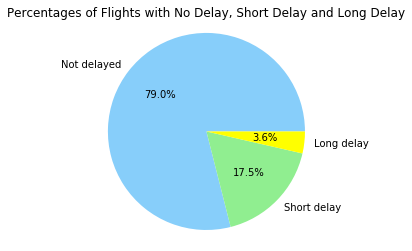

In [56]:
# Create a pie chart to show percentage of delays 

Delay = ['Not delayed', 'Short delay', 'Long delay']
percentage = [percentage_non_delayed, percentage_short_delay, percentage_long_delay]
colours = ['lightskyblue', 'lightgreen', 'yellow']

plt.pie(percentage, explode = None, labels = Delay, colors = colours, autopct= '%1.1f%%')
plt.axis('equal')
plt.title('Percentages of Flights with No Delay, Short Delay and Long Delay')

### b) CRS_ELAPSED_TIME (SCHEDULED FLIGHT DURATION)

In [57]:
full_df[['CRS_ELAPSED_TIME','DISTANCE']].describe()

,CRS_ELAPSED_TIME,DISTANCE
count,954255.000000,954255.000000
mean,191.523094,1025.684277
std,94.960219,719.473485
min,24.000000,94.000000
25%,121.000000,483.000000
50%,170.000000,765.000000
75%,233.000000,1389.000000
max,510.000000,2586.000000


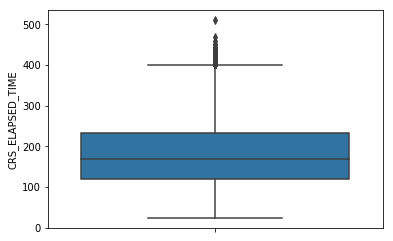

In [58]:
sns.boxplot(y = full_df['CRS_ELAPSED_TIME'])

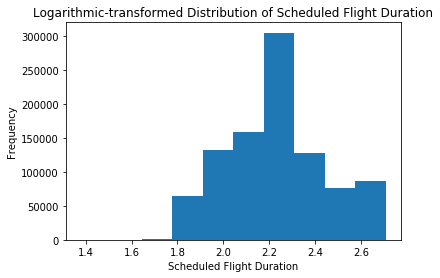

In [59]:
# Logarithmic-transformed Distribution of Scheduled Flight Duration

from math import log
#take log to the base 10

def logify(x):
    return log(x,10) if x else 0

plt.hist(full_df['CRS_ELAPSED_TIME'].apply(logify))
plt.xlabel('Scheduled Flight Duration')
plt.ylabel('Frequency') 
plt.title('Logarithmic-transformed Distribution of Scheduled Flight Duration')
plt.show()

### c) FLIGHT DISTANCE

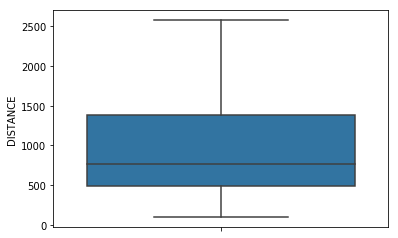

In [60]:
sns.boxplot(y = full_df['DISTANCE'])

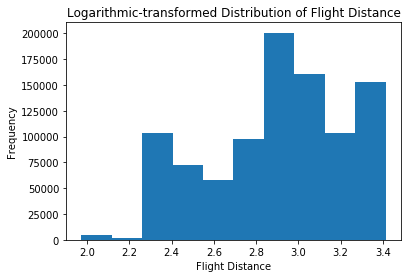

In [61]:
# Logarithmic-transformed Distribution of Flight distance

plt.hist(full_df['DISTANCE'].apply(logify))
plt.xlabel('Flight Distance')
plt.ylabel('Frequency') 
plt.title('Logarithmic-transformed Distribution of Flight Distance')
plt.show()

## ii) Relationship Analysis

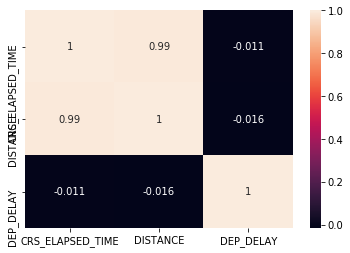

In [62]:
# correlation
corrMatrix = full_df[['CRS_ELAPSED_TIME', 'DISTANCE','DEP_DELAY']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

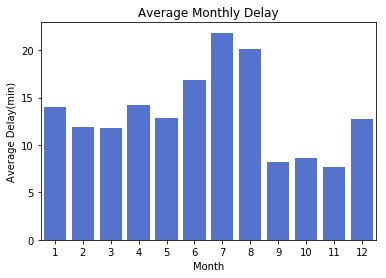

In [63]:
# Month vs avg delay
avg_delay_by_month= pd.DataFrame(full_df.groupby('MONTH').mean()['DEP_DELAY'])
sns.barplot(data=avg_delay_by_month, x=avg_delay_by_month.index, y="DEP_DELAY", color='royalblue')
plt.xlabel('Month')
plt.ylabel('Average Delay(min)')
plt.title('Average Monthly Delay')
plt.show()

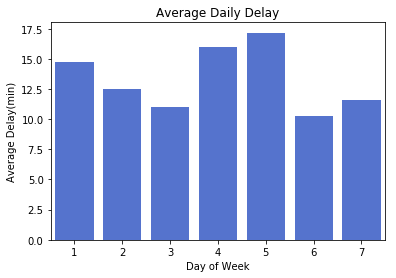

In [64]:
# Weekday vs avg delay
avg_delay_by_weekday= pd.DataFrame(full_df.groupby('DAY_OF_WEEK').mean()['DEP_DELAY'])
sns.barplot(data=avg_delay_by_weekday, x=avg_delay_by_weekday.index, y="DEP_DELAY", color='royalblue')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay(min)')
plt.title('Average Daily Delay')
plt.show()

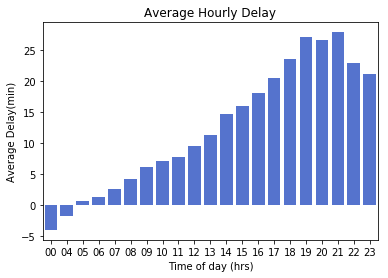

In [65]:
# Hour vs avg delay
avg_delay_by_hour= pd.DataFrame(full_df.groupby('CRS_DEP_TIME').mean()['DEP_DELAY'])
sns.barplot(data=avg_delay_by_hour, x=avg_delay_by_hour.index, y="DEP_DELAY", color='royalblue')
plt.xlabel('Time of day (hrs)')
plt.ylabel('Average Delay(min)')
plt.title('Average Hourly Delay')
plt.show()

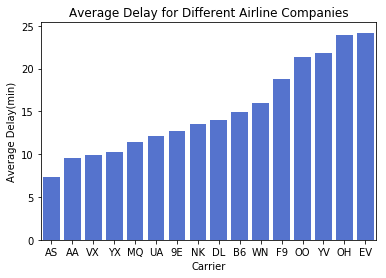

In [66]:
# Airline vs avg delay
avg_delay_by_carrier= pd.DataFrame(full_df.groupby('OP_CARRIER').mean()['DEP_DELAY'])
avg_delay_by_carrier_sorted= avg_delay_by_carrier.sort_values(by=['DEP_DELAY'])
sns.barplot(data=avg_delay_by_carrier_sorted, x=avg_delay_by_carrier_sorted.index, y="DEP_DELAY", color='royalblue')
plt.xlabel('Carrier')
plt.ylabel('Average Delay(min)')
plt.title('Average Delay for Different Airline Companies')
plt.show()

/Users/yutinglang/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


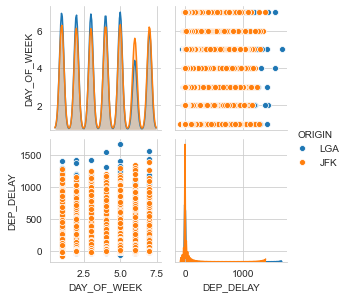

In [82]:
# The delay of two origins in days of a week
sns.set_style("whitegrid");
sns.pairplot(full_df[['DAY_OF_WEEK', 'DEP_DELAY', 'ORIGIN']], hue='ORIGIN', size=2);
plt.show()

/Users/yutinglang/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


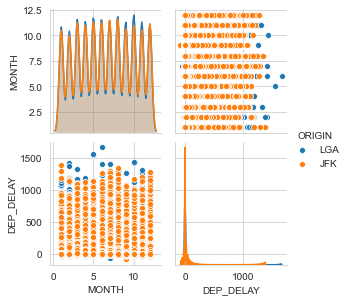

In [83]:
# The delay of two origins in months of a year
sns.set_style("whitegrid");
sns.pairplot(full_df[['MONTH', 'DEP_DELAY', 'ORIGIN']], hue='ORIGIN', size=2);
plt.show()

In [84]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = list(initial_model_df.drop(['Delay'], axis=1).columns)
# Separating out the features
x_pca = initial_model_df.loc[:, features].values
# Separating out the target
y_pca = initial_model_df.loc[:,['Delay']].values
# Standardizing the features
x_pca = StandardScaler().fit_transform(x_pca)

In [85]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, initial_model_df[['Delay']]], axis = 1)

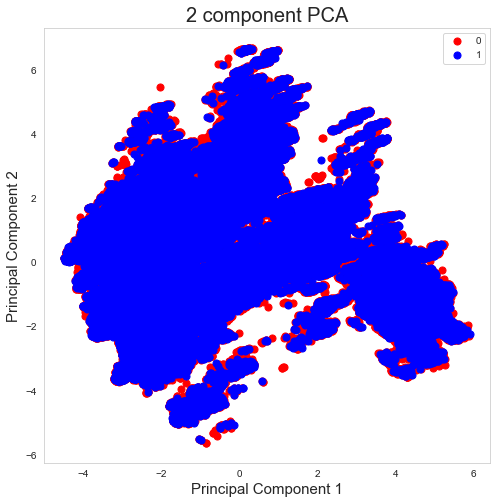

In [87]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Delay'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# 5) Modelling

In [52]:
# from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [53]:
initial_model_df= full_df.drop('DEP_DELAY', axis= 1)
initial_model_df.head()

,MONTH,DAY_OF_WEEK,Date,OP_CARRIER,ORIGIN,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DEL15,CRS_ELAPSED_TIME,DISTANCE,Holiday,Conditions
0,11,5,2019-11-29,WN,LGA,ATL,GA,11,0,170,762,0,Clear
1,11,5,2019-11-29,WN,LGA,ATL,GA,16,0,165,762,0,Clear
2,11,5,2019-11-29,WN,LGA,ATL,GA,10,0,170,762,0,Clear
3,11,5,2019-11-29,WN,LGA,ATL,GA,06,0,160,762,0,Clear
4,11,5,2019-11-29,WN,LGA,ATL,GA,20,0,165,762,0,Clear


In [54]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
initial_model_df['Carrier_cat'] = labelencoder.fit_transform(initial_model_df['OP_CARRIER'])
initial_model_df['Origin_cat'] = labelencoder.fit_transform(initial_model_df['ORIGIN'])
initial_model_df['Dest_cat'] = labelencoder.fit_transform(initial_model_df['DEST'])
initial_model_df['Dest_state_cat'] = labelencoder.fit_transform(initial_model_df['DEST_STATE_ABR'])
initial_model_df['Condition_cat'] = labelencoder.fit_transform(initial_model_df['Conditions'])
initial_model_df.head()

,MONTH,DAY_OF_WEEK,Date,OP_CARRIER,ORIGIN,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DEL15,CRS_ELAPSED_TIME,DISTANCE,Holiday,Conditions,Carrier_cat,Origin_cat,Dest_cat,Dest_state_cat,Condition_cat
0,11,5,2019-11-29,WN,LGA,ATL,GA,11,0,170,762,0,Clear,13,1,3,6,0
1,11,5,2019-11-29,WN,LGA,ATL,GA,16,0,165,762,0,Clear,13,1,3,6,0
2,11,5,2019-11-29,WN,LGA,ATL,GA,10,0,170,762,0,Clear,13,1,3,6,0
3,11,5,2019-11-29,WN,LGA,ATL,GA,06,0,160,762,0,Clear,13,1,3,6,0
4,11,5,2019-11-29,WN,LGA,ATL,GA,20,0,165,762,0,Clear,13,1,3,6,0


In [55]:
# generate binary values using get_dummies
initial_model_df['Month']= initial_model_df['MONTH']
initial_model_df['Weekday']= initial_model_df['DAY_OF_WEEK']
initial_model_df ['Hour']= initial_model_df['CRS_DEP_TIME'].astype(int)
initial_model_df = pd.get_dummies(initial_model_df, columns=["MONTH"], prefix=["Month_is"] )
initial_model_df = pd.get_dummies(initial_model_df, columns=["DAY_OF_WEEK"], prefix=["Weekday_is"] )
initial_model_df = pd.get_dummies(initial_model_df, columns=["CRS_DEP_TIME"], prefix=["Hour_is"] )
initial_model_df = pd.get_dummies(initial_model_df, columns=["OP_CARRIER"], prefix=["Carrier_is"] )
initial_model_df = pd.get_dummies(initial_model_df, columns=["ORIGIN"], prefix=["Origin_is"] )
initial_model_df = pd.get_dummies(initial_model_df, columns=["DEST"], prefix=["Dest_is"] )
initial_model_df = pd.get_dummies(initial_model_df, columns=["DEST_STATE_ABR"], prefix=["Dest_state_is"] )
initial_model_df = pd.get_dummies(initial_model_df, columns=["Conditions"], prefix=["Condition_is"] )
initial_model_df.head()

,Date,DEP_DEL15,CRS_ELAPSED_TIME,DISTANCE,Holiday,Carrier_cat,Origin_cat,Dest_cat,Dest_state_cat,Condition_cat,...,Dest_state_is_WY,Condition_is_Clear,Condition_is_Overcast,Condition_is_Partially cloudy,Condition_is_Rain,"Condition_is_Rain, Overcast","Condition_is_Rain, Partially cloudy",Condition_is_Snow,"Condition_is_Snow, Overcast","Condition_is_Snow, Partially cloudy"
0,2019-11-29,0,170,762,0,13,1,3,6,0,...,0,1,0,0,0,0,0,0,0,0
1,2019-11-29,0,165,762,0,13,1,3,6,0,...,0,1,0,0,0,0,0,0,0,0
2,2019-11-29,0,170,762,0,13,1,3,6,0,...,0,1,0,0,0,0,0,0,0,0
3,2019-11-29,0,160,762,0,13,1,3,6,0,...,0,1,0,0,0,0,0,0,0,0
4,2019-11-29,0,165,762,0,13,1,3,6,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
initial_model_df['Delay']= initial_model_df['DEP_DEL15']
initial_model_df= initial_model_df.drop(['DEP_DEL15','Date'], axis = 1)
initial_model_df.head()

,CRS_ELAPSED_TIME,DISTANCE,Holiday,Carrier_cat,Origin_cat,Dest_cat,Dest_state_cat,Condition_cat,Month,Weekday,...,Condition_is_Clear,Condition_is_Overcast,Condition_is_Partially cloudy,Condition_is_Rain,"Condition_is_Rain, Overcast","Condition_is_Rain, Partially cloudy",Condition_is_Snow,"Condition_is_Snow, Overcast","Condition_is_Snow, Partially cloudy",Delay
0,170,762,0,13,1,3,6,0,11,5,...,1,0,0,0,0,0,0,0,0,0
1,165,762,0,13,1,3,6,0,11,5,...,1,0,0,0,0,0,0,0,0,0
2,170,762,0,13,1,3,6,0,11,5,...,1,0,0,0,0,0,0,0,0,0
3,160,762,0,13,1,3,6,0,11,5,...,1,0,0,0,0,0,0,0,0,0
4,165,762,0,13,1,3,6,0,11,5,...,1,0,0,0,0,0,0,0,0,0


In [57]:
initial_model_df.shape

(954255, 224)

## i) XGBOOST

In [60]:
model_df = initial_model_df

In [61]:
# split data into X and Y
X = model_df.drop(['Delay'], axis=1)
Y = model_df['Delay']

In [62]:
# split data into train and test sets
seed = 30034
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [44]:
# fit model to training data
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
# make predictions for test data
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [46]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.30%


In [72]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
auc= roc_auc_score(y_test,y_pred)
print('AUC: %f' % auc)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Accuracy: 80.30%
AUC: 0.567247
Precision: 0.628275
Recall: 0.159737


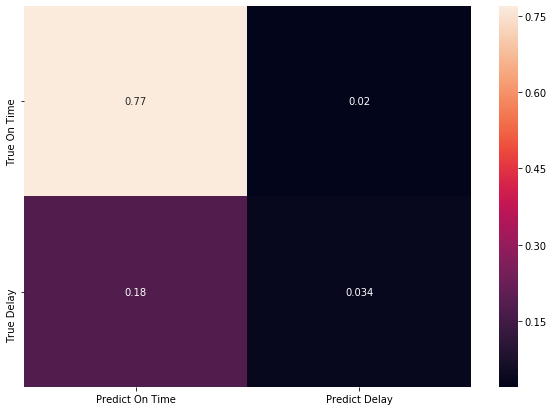

In [63]:
array= confusion_matrix(y_test, predictions)/ X_test.shape[0]
cm_df = pd.DataFrame(array, index = ['True On Time', 'True Delay'],
                  columns = ['Predict On Time', 'Predict Delay'])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True)

In [70]:
# tuning 'max_depth' and 'n_estimators'
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(4,10,2),
 'n_estimators':range(50,200,50)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [71]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 8, 'n_estimators': 150}, 0.7406911776052666)

In [75]:
# tuning gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, n_estimators= 150), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=8, min_child_weight=None,
                                     missing=nan, monotone_constraints...
                                     n_estimators=150, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, 

In [76]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.7406911776052666)

In [73]:
# fit best parameters
xgb_model_tuning1 = XGBClassifier(max_depth= 8, n_estimators= 150)
xgb_model_tuning1.fit(X_train, y_train)
y_pred = xgb_model_tuning1.predict(X_test)
predictions = [round(value) for value in y_pred]

In [74]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
auc= roc_auc_score(y_test,y_pred)
print('AUC: %f' % auc)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Accuracy: 80.60%
AUC: 0.582740
Precision: 0.626987
Recall: 0.196742


In [83]:
# check over-fitting
X_pred = xgb_model_tuning1.predict(X_train)
predictions = [round(value) for value in X_pred]
# evaluate predictions
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
auc= roc_auc_score(y_train,X_pred)
print('AUC: %f' % auc)
# precision tp / (tp + fp)
precision = precision_score(y_train, X_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, X_pred)
print('Recall: %f' % recall)

Accuracy: 81.74%
AUC: 0.599382
Precision: 0.708971
Recall: 0.223160


In [86]:
# check trade-off between iterations and performance
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model_tuning1 = XGBClassifier(max_depth= 8, n_estimators= 150)
xgb_model_tuning1.fit(X_train, y_train, eval_metric=["auc","error"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgb_model_tuning1.predict(X_test)
predictions = [round(value) for value in y_pred]

# retrieve performance metrics
results = xgb_model_tuning1.evals_result()

[0]	validation_0-auc:0.70561	validation_0-error:0.20525	validation_1-auc:0.70236	validation_1-error:0.20702
[1]	validation_0-auc:0.71079	validation_0-error:0.20327	validation_1-auc:0.70769	validation_1-error:0.20466
[2]	validation_0-auc:0.71601	validation_0-error:0.20186	validation_1-auc:0.71221	validation_1-error:0.20312
[3]	validation_0-auc:0.71904	validation_0-error:0.20152	validation_1-auc:0.71478	validation_1-error:0.20261
[4]	validation_0-auc:0.72131	validation_0-error:0.20113	validation_1-auc:0.71660	validation_1-error:0.20203
[5]	validation_0-auc:0.72357	validation_0-error:0.20083	validation_1-auc:0.71814	validation_1-error:0.20180
[6]	validation_0-auc:0.72588	validation_0-error:0.20008	validation_1-auc:0.71963	validation_1-error:0.20141
[7]	validation_0-auc:0.72774	validation_0-error:0.19967	validation_1-auc:0.72108	validation_1-error:0.20107
[8]	validation_0-auc:0.73053	validation_0-error:0.19852	validation_1-auc:0.72317	validation_1-error:0.20006
[9]	validation_0-auc:0.73220

[76]	validation_0-auc:0.77011	validation_0-error:0.18797	validation_1-auc:0.74062	validation_1-error:0.19493
[77]	validation_0-auc:0.77038	validation_0-error:0.18795	validation_1-auc:0.74053	validation_1-error:0.19492
[78]	validation_0-auc:0.77063	validation_0-error:0.18788	validation_1-auc:0.74056	validation_1-error:0.19488
[79]	validation_0-auc:0.77072	validation_0-error:0.18788	validation_1-auc:0.74059	validation_1-error:0.19482
[80]	validation_0-auc:0.77125	validation_0-error:0.18776	validation_1-auc:0.74082	validation_1-error:0.19483
[81]	validation_0-auc:0.77203	validation_0-error:0.18751	validation_1-auc:0.74110	validation_1-error:0.19473
[82]	validation_0-auc:0.77256	validation_0-error:0.18737	validation_1-auc:0.74120	validation_1-error:0.19463
[83]	validation_0-auc:0.77281	validation_0-error:0.18729	validation_1-auc:0.74123	validation_1-error:0.19465
[84]	validation_0-auc:0.77324	validation_0-error:0.18721	validation_1-auc:0.74127	validation_1-error:0.19457
[85]	validation_0-a

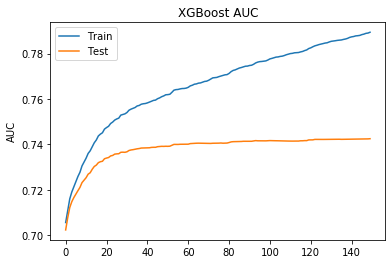

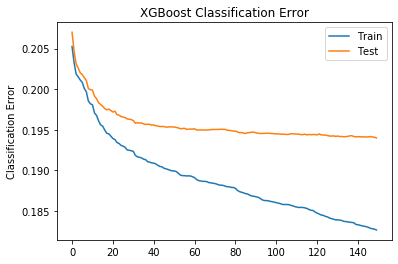

In [90]:
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)
# plot auc
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [94]:
# tuning regularization parameter
param_test3 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, n_estimators= 150), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=8, min_child_weight=None,
                                     missing=nan, monotone_constraints...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsampl

In [95]:
gsearch3.best_params_, gsearch3.best_score_

({'reg_alpha': 0}, 0.7406911776052666)

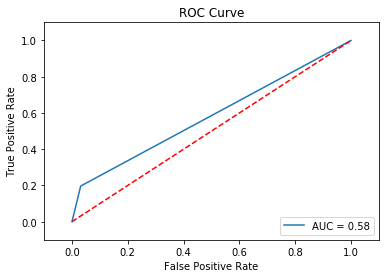

In [98]:
# ROC-AUC PLOT
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred = xgb_model_tuning1.predict(X_test)

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

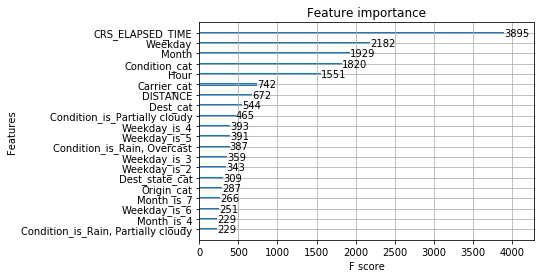

In [223]:
# plot feature importance
from xgboost import plot_importance
plot_importance(xgb_model_tuning1, max_num_features= 20)
plt.show()

In [236]:
# feature selection

model_df_select= full_df.drop('DEP_DELAY', axis= 1)
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
model_df_select['Carrier_cat'] = labelencoder.fit_transform(model_df_select['OP_CARRIER'])
model_df_select['Origin_cat'] = labelencoder.fit_transform(model_df_select['ORIGIN'])
model_df_select['Dest_cat'] = labelencoder.fit_transform(model_df_select['DEST'])
model_df_select['Dest_state_cat'] = labelencoder.fit_transform(model_df_select['DEST_STATE_ABR'])
model_df_select['Condition_cat'] = labelencoder.fit_transform(model_df_select['Conditions'])
# generate binary values using get_dummies
model_df_select['Month']= model_df_select['MONTH']
model_df_select['Weekday']= model_df_select['DAY_OF_WEEK']
model_df_select['Hour']= model_df_select['CRS_DEP_TIME'].astype(int)
model_df_select = pd.get_dummies(model_df_select, columns=["MONTH"], prefix=["Month_is"] )
model_df_select = pd.get_dummies(model_df_select, columns=["DAY_OF_WEEK"], prefix=["Weekday_is"] )
model_df_select = pd.get_dummies(model_df_select, columns=["Conditions"], prefix=["Condition_is"] )

model_df_select['Delay']= model_df_select['DEP_DEL15']
model_df_select= model_df_select.drop(['DEP_DEL15','Date','CRS_DEP_TIME','OP_CARRIER','ORIGIN','DEST','DEST_STATE_ABR'], axis = 1)
model_df_select.head()

,CRS_ELAPSED_TIME,DISTANCE,Holiday,Carrier_cat,Origin_cat,Dest_cat,Dest_state_cat,Condition_cat,Month,Weekday,...,Condition_is_Clear,Condition_is_Overcast,Condition_is_Partially cloudy,Condition_is_Rain,"Condition_is_Rain, Overcast","Condition_is_Rain, Partially cloudy",Condition_is_Snow,"Condition_is_Snow, Overcast","Condition_is_Snow, Partially cloudy",Delay
0,170,762,0,13,1,3,6,0,11,5,...,1,0,0,0,0,0,0,0,0,0
1,165,762,0,13,1,3,6,0,11,5,...,1,0,0,0,0,0,0,0,0,0
2,170,762,0,13,1,3,6,0,11,5,...,1,0,0,0,0,0,0,0,0,0
3,160,762,0,13,1,3,6,0,11,5,...,1,0,0,0,0,0,0,0,0,0
4,165,762,0,13,1,3,6,0,11,5,...,1,0,0,0,0,0,0,0,0,0


In [239]:
# Redo the whole model-fitting process

# split data into X and Y
X = model_df_select.drop(['Delay'], axis=1)
Y = model_df_select['Delay']
# split data into train and test sets
seed = 30034
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit best parameters
xgb_model_selection = XGBClassifier(max_depth= 8, n_estimators= 150, min_child_weight= 8)
xgb_model_selection.fit(X_train, y_train)
y_pred = xgb_model_selection.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
auc= roc_auc_score(y_test,y_pred)
print('AUC: %f' % auc)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Accuracy: 80.67%
AUC: 0.584416
Precision: 0.624851
Recall: 0.200931


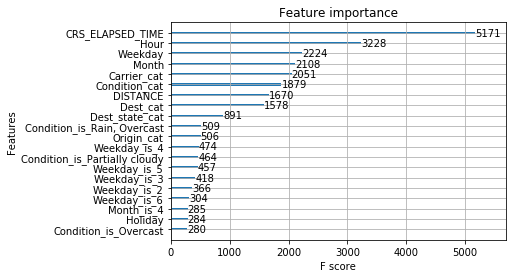

In [233]:
# plot feature importance
plot_importance(xgb_model_selection, max_num_features= 20)
plt.show()

# ii) Logistic Regression

In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [56]:
lr_model= initial_model_df

In [57]:
# split data into X and Y
X = lr_model.drop(['Delay'], axis=1)
Y = lr_model['Delay']

In [58]:
# split data into train and test sets
seed = 30034
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [59]:
# To scale: 'CRS_ELAPSED_TIME','DISTANCE' 
from sklearn import preprocessing

# scale to [0,1] range

# FOR TRAINING DATA (X_train)
min_max_scaler = preprocessing.MinMaxScaler()
X_train['CRS_ELAPSED_TIME'] = min_max_scaler.fit_transform(X_train['CRS_ELAPSED_TIME'].values.reshape(-1,1))
X_train['DISTANCE'] = min_max_scaler.fit_transform(X_train['DISTANCE'].values.reshape(-1,1))

# FOR TESTING DATA (x_test)
X_test['CRS_ELAPSED_TIME'] = min_max_scaler.fit_transform(X_test['CRS_ELAPSED_TIME'].values.reshape(-1,1))
X_test['DISTANCE'] = min_max_scaler.fit_transform(X_test['DISTANCE'].values.reshape(-1,1))

C:\Users\miows\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\miows\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\miows\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [60]:
# Fit model (Logistic Regression)
mlr = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
mlr_fitting = mlr.fit(X_train, y_train)

In [61]:
y_predict = mlr_fitting.predict(X_test)
print(f"Accuracy Score of Logistic Regression is ", accuracy_score(y_test, y_predict) * 100)

auc= roc_auc_score(y_test,y_predict)
print('AUC: %f' % auc)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_predict)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predict)
print('Recall: %f' % recall)

Accuracy Score of Logistic Regression is  79.35845352578097
AUC: 0.527575
Precision: 0.574607
Recall: 0.068678


# iii) SVM

In [76]:
import numpy as np
from random import sample
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [68]:
SVM_df = initial_model_df.sample(10000)

In [69]:
X_SVM = SVM_df.drop(['Delay'], axis=1)
Y_SVM = SVM_df['Delay']

# Normalisation
normalized_X = preprocessing.normalize(X_SVM.values)
X_SVM = pd.DataFrame(normalized_X, index=X_SVM.index, columns=X_SVM.columns)

# Standardization
scaler = StandardScaler()
X_SVM = scaler.fit_transform(X_SVM)

# Train test split
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM, Y_SVM, 
                                                                    test_size=0.3, random_state=1234)

In [70]:
SVM_model = SVC(kernel="linear", C=0.1, gamma=1)
clf = SVM_model.fit(X_train_SVM, y_train_SVM)

In [71]:
# Check overfitting of the model
# Predicting over the Train Set
train_pred_SVM = clf.predict(X_train_SVM)
train_score = clf.score(X_train_SVM, y_train_SVM)
print('Training Score', train_score)

# Predicting over the Test Set
test_predict = clf.predict(X_SVM)
test_score = clf.score(X_test_SVM, y_test_SVM)
print('Test score', test_score )
#pd.Series(train_pred_SVM).unique()

Training Score 0.7935714285714286
Test score 0.8023333333333333


In [72]:
#Train the model using the training sets

#Predict the response for the whole sample (n=10000)
y_pred_SVM = clf.predict(X_SVM)

print('Accuracy: ', metrics.accuracy_score(Y_SVM, y_pred_SVM))
print('Precision: ', metrics.precision_score(Y_SVM, y_pred_SVM))
print('Recall: ', metrics.recall_score(Y_SVM, y_pred_SVM))
print('AUC: ', roc_auc_score(Y_SVM,y_pred_SVM))

Accuracy:  0.7962
Precision:  0.4782608695652174
Recall:  0.005400098183603338
AUC:  0.5019465642242894


In [77]:
SVM_model = SVC(kernel="rbf")
clf = SVM_model.fit(X_train_SVM, y_train_SVM)

In [78]:
# Try linearSVM
from sklearn.svm import LinearSVC
svc = LinearSVC()
clf1 = svc.fit(X_train_SVM, y_train_SVM)

/Users/yutinglang/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [79]:
# Check overfitting of the model
# Predicting over the Train Set
train_pred_SVM1 = clf1.predict(X_train_SVM)
train_score1 = clf1.score(X_train_SVM, y_train_SVM)
print('Training Score', train_score1)

# Predicting over the Test Set
test_predict1 = clf1.predict(X_SVM)
test_score1 = clf1.score(X_test_SVM, y_test_SVM)
print('Test score', test_score1 )
#pd.Series(train_pred_SVM).unique()

Training Score 0.7894285714285715
Test score 0.7893333333333333


In [80]:
#Train the model using the training sets

#Predict the response for the whole sample (n=10000)
y_pred_SVM1 = clf1.predict(X_SVM)

print('Accuracy: ', metrics.accuracy_score(Y_SVM, y_pred_SVM1))
print('Precision: ', metrics.precision_score(Y_SVM, y_pred_SVM1))
print('Recall: ', metrics.recall_score(Y_SVM, y_pred_SVM1))
print('AUC: ', roc_auc_score(Y_SVM,y_pred_SVM1))

Accuracy:  0.7894
Precision:  0.4148148148148148
Recall:  0.08247422680412371
AUC:  0.5263557872686949


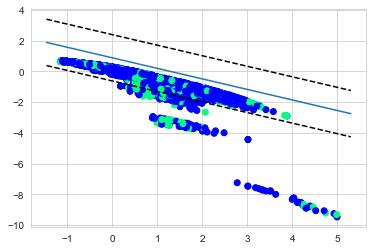

In [81]:
# Plot the boundary
plt.scatter(X_train_SVM[:, 0], X_train_SVM[:, 1], c=y_train_SVM, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

# iv) Zero-R (Baseline)

In [59]:
from sklearn.dummy import DummyClassifier

In [60]:
baseline_model = initial_model_df

In [61]:
# split data into X and Y
X = baseline_model.drop(['Delay'], axis=1)
Y = baseline_model['Delay']

In [62]:
# split data into train and test sets
seed = 30034
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [63]:
# Zero-R classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit into Zero-R
dummy_clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [64]:
y_predict = dummy_clf.predict(X_test)
print(f"Accuracy Score of Zero-R is ", accuracy_score(y_test, y_predict) * 100)

auc= roc_auc_score(y_test,y_predict)
print('AUC: %f' % auc)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_predict)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predict)
print('Recall: %f' % recall)

Accuracy Score of Zero-R is  78.98364171763711
AUC: 0.500000
Precision: 0.000000
Recall: 0.000000


C:\Users\miows\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
